# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])


df_diabetes = pd.read_csv("diabetes_dataset.csv")
df_kidney = pd.read_csv("Kidney_dataset.csv")
df_hypertension = pd.read_csv("hypertension_dataset.csv")

print("Diabetes Dataset:")
print(df_diabetes.head(), "\n")

print("Kidney Dataset:")
print(df_kidney.head(), "\n")

print("Hypertension Dataset:")
print(df_hypertension.head(), "\n")

Diabetes Dataset:
   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1              0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2              0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3              0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4              0.0     0.0       0.0        1.0  29.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           1.0     0.0  ...            1.0   
1                   0.0           0.0     1.0  ...            1.0   
2                   0.0           1.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      3.0       5.0      30.0      

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

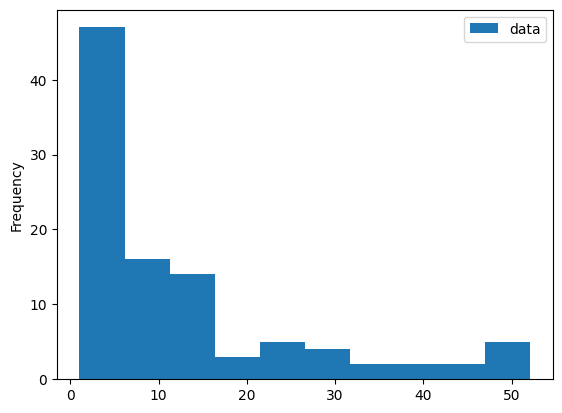

In [2]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

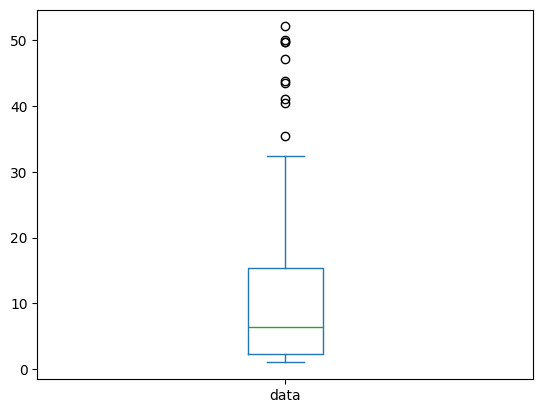

In [3]:
df.plot.box()

## Histogram Pros and Cons
Pros: Makes it easy to visually see the clusters (or gaps) in the data as well as the overall shape. 
Cons: Bin size may skew information, harder to see outliers. 

## Boxplot Pros and Cons
Pros: Shows summary info clearly(mean, outliers, etc), easy to compare side by side. 
Cons: Doesnt show distribution shape, harder to understand if not presenting to an informed/technical crowd.

## What I would choose and how to improve:
I would choose the boxplot for this data. We are trying to focus on the expensive drug products so the boxplot would show how far the high prices deviate as well as any outliers. It may make it more visually informative to incorperate grid lines. This could also be rotated horizontally to make it easier to read large or skewed numbers. 

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

## Diabetes Dataset

### BMI Histogram

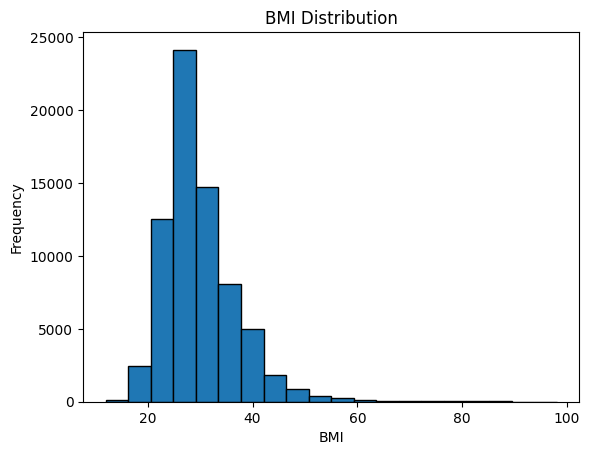

In [11]:
plt.hist(df_diabetes["BMI"], bins=20, edgecolor='black')
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

### Grouped Histogram

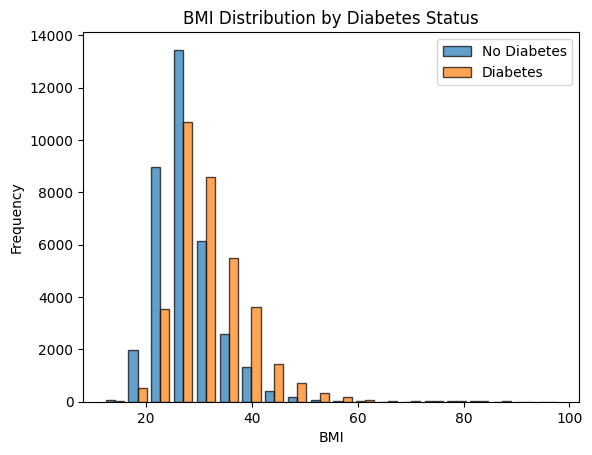

In [13]:
plt.hist(
    [df_diabetes[df_diabetes["Diabetes_binary"] == 0]["BMI"],
     df_diabetes[df_diabetes["Diabetes_binary"] == 1]["BMI"]],
    bins=20,
    label=["No Diabetes", "Diabetes"],
    edgecolor='black',
    alpha=0.7
)
plt.title("BMI Distribution by Diabetes Status")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.legend()
plt.show()

### Bar Plot

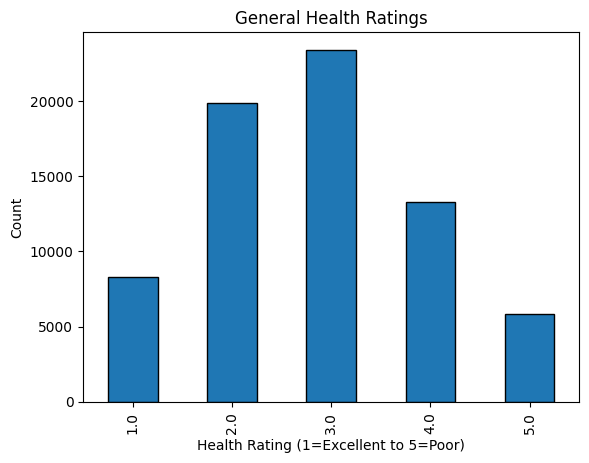

In [14]:
df_diabetes["GenHlth"].value_counts().sort_index().plot(kind="bar", edgecolor='black')
plt.title("General Health Ratings")
plt.xlabel("Health Rating (1=Excellent to 5=Poor)")
plt.ylabel("Count")
plt.show()

In [16]:
print("Mean BMI:", round(df_diabetes["BMI"].mean(), 2))
print("Median BMI:", df_diabetes["BMI"].median())
print("Mode BMI:", df_diabetes["BMI"].mode()[0])

print("Skewness of BMI:", df_diabetes["BMI"].skew())

Mean BMI: 29.86
Median BMI: 29.0
Mode BMI: 27.0
Skewness of BMI: 1.7191801918140364


### Bin Width

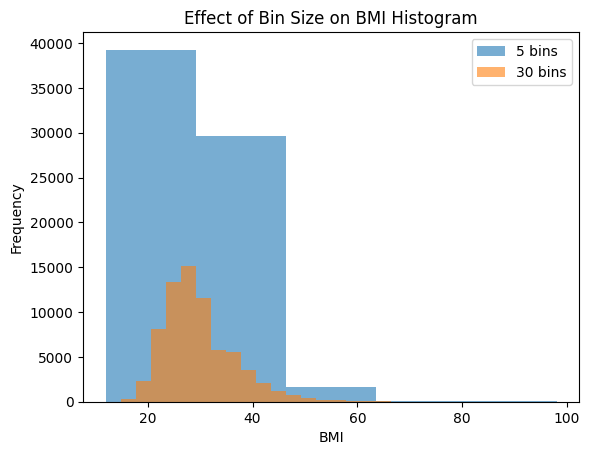

In [17]:
plt.hist(df_diabetes["BMI"], bins=5, alpha=0.6, label="5 bins")
plt.hist(df_diabetes["BMI"], bins=30, alpha=0.6, label="30 bins")
plt.title("Effect of Bin Size on BMI Histogram")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.legend()
plt.show()

## Diabetes BMI Conclusions: 
BMI Distribution: Right Skewed, BMI is slightly higher in people with diabetes, some values >40 but no extreme outliers. 

Yes, this data seems usable. Clarly marked and cleaned from previous weeks. Binary and numerical data. 

## Hypertension Dataset

### Hypertension BMI Histogram

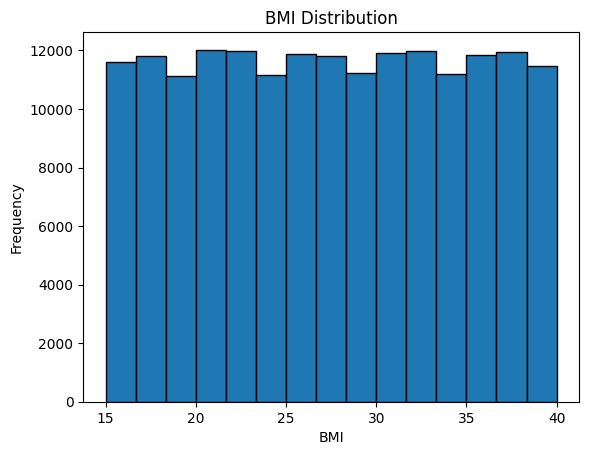

In [18]:
plt.hist(df_hypertension["BMI"], bins=15, edgecolor='black')
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

### Hypertension Grouped Histogram (Systolic BP by hypertension)

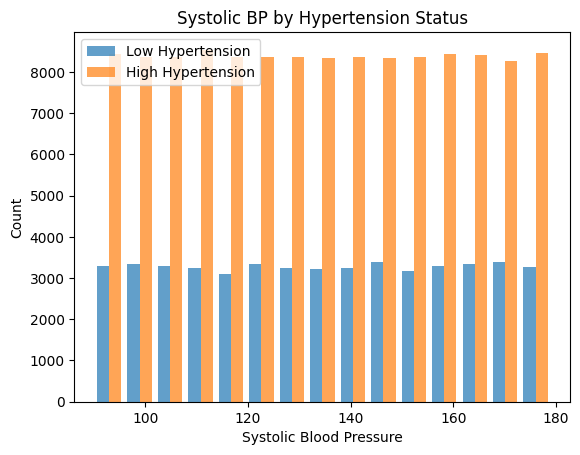

In [19]:
plt.hist(
    [df_hypertension[df_hypertension["Hypertension"] == "Low"]["Systolic_BP"],
     df_hypertension[df_hypertension["Hypertension"] == "High"]["Systolic_BP"]],
    bins=15,
    label=["Low Hypertension", "High Hypertension"],
    alpha=0.7,
)
plt.title("Systolic BP by Hypertension Status")
plt.xlabel("Systolic Blood Pressure")
plt.ylabel("Count")
plt.legend()
plt.show()

### Hypertension Bar Plot(Smoking Status)

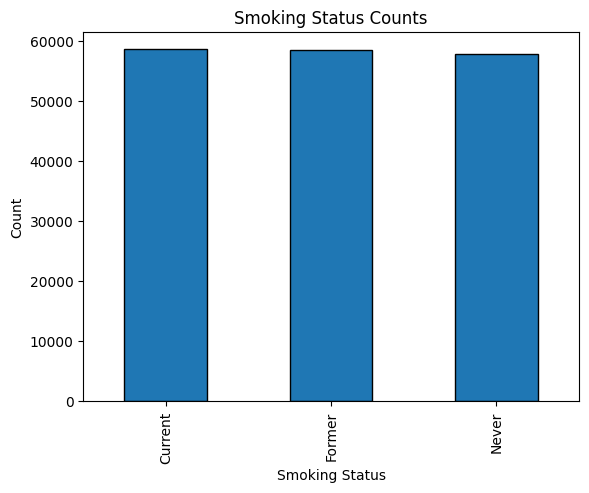

In [20]:
df_hypertension["Smoking_Status"].value_counts().plot(kind="bar", edgecolor='black')
plt.title("Smoking Status Counts")
plt.xlabel("Smoking Status")
plt.ylabel("Count")
plt.show()

In [22]:
print("Mean Systolic BP:", round(df_hypertension["Systolic_BP"].mean(), 2))
print("Median Cholesterol:", df_hypertension["Cholesterol"].median())
print("Mode BMI:", df_hypertension["BMI"].mode()[0])

print("Skewness of BMI:", df_hypertension["BMI"].skew())

Mean Systolic BP: 134.51
Median Cholesterol: 225.0
Mode BMI: 22.5
Skewness of BMI: -0.00024476882379674845


### Hypertension Conclusions: 
BMI is right skewed with high outliers, systolic bp is high in those with high hypertension.

## Kidney Dataset

### Histogram GFR

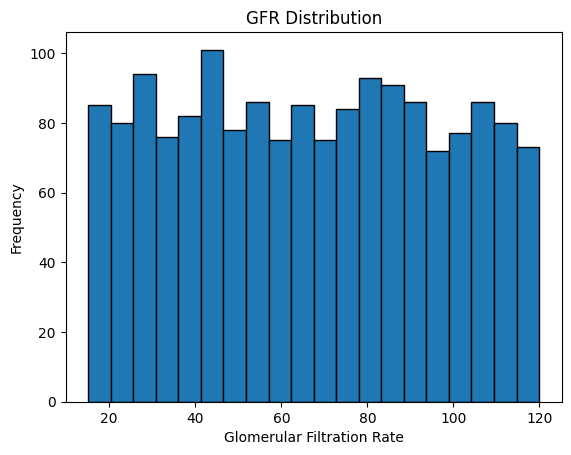

In [23]:
plt.hist(df_kidney["GFR"], bins=20, edgecolor='black')
plt.title("GFR Distribution")
plt.xlabel("Glomerular Filtration Rate")
plt.ylabel("Frequency")
plt.show()

### Grouped Histogram Protein in Urine

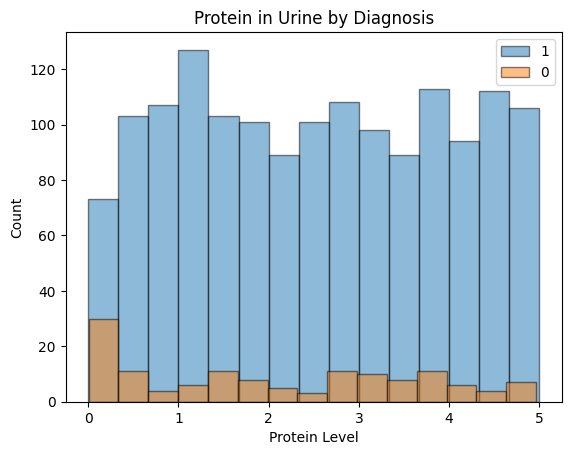

In [24]:
if "Diagnosis" in df_kidney.columns:
    diagnosis_labels = df_kidney["Diagnosis"].unique()

    for diagnosis in diagnosis_labels:
        subset = df_kidney[df_kidney["Diagnosis"] == diagnosis]["ProteinInUrine"]
        plt.hist(subset, bins=15, alpha=0.5, label=str(diagnosis), edgecolor='black')

    plt.title("Protein in Urine by Diagnosis")
    plt.xlabel("Protein Level")
    plt.ylabel("Count")
    plt.legend()
    plt.show()

### Bar Plot Family History

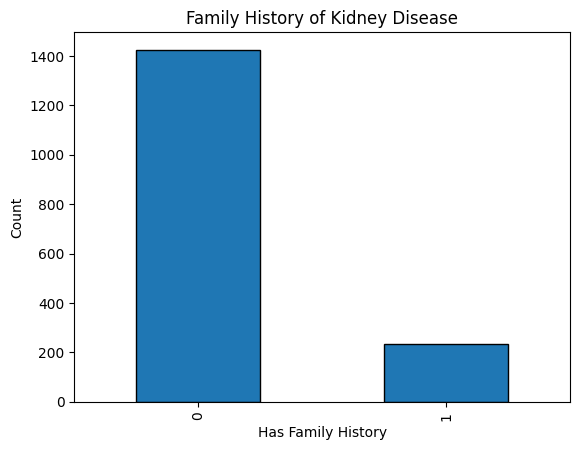

In [25]:
df_kidney["FamilyHistoryKidneyDisease"].value_counts().plot(kind="bar", edgecolor='black')
plt.title("Family History of Kidney Disease")
plt.xlabel("Has Family History")
plt.ylabel("Count")
plt.show()

In [26]:
print("Mean GFR:", round(df_kidney["GFR"].mean(), 2))
print("Median Protein in Urine:", df_kidney["ProteinInUrine"].median())
print("Mode HbA1c:", df_kidney["HbA1c"].mode()[0])

Mean GFR: 66.83
Median Protein in Urine: 2.5052600011773167
Mode HbA1c: 4.000404985879447


## Kidney Dataset Conclusions:
While the pattern varies, it appears there is a higher frequency in kidney disease in the <60 GFR range. 

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

### Horizontal Bar Chart (Catagory Comparisons) from page 56

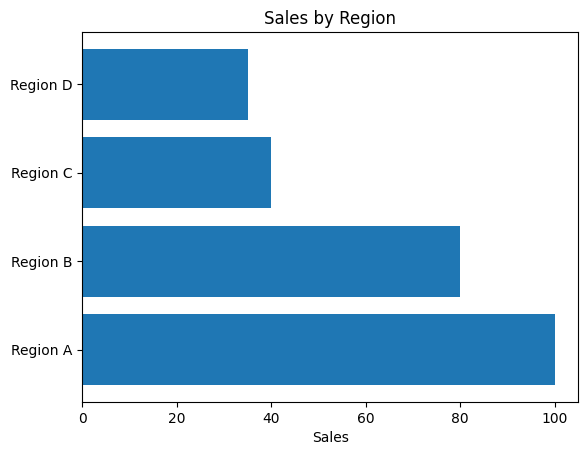

In [27]:

regions = ['Region A', 'Region B', 'Region C', 'Region D']
sales = [100, 80, 40, 35]

plt.barh(regions, sales)
plt.xlabel('Sales')
plt.title('Sales by Region')
plt.show()